#📌 Extracción

In [43]:
import pandas as pd

In [44]:
# Generar el df
datos = pd.read_json('/content/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

Las columnas customer, phone, internet y account son objetos JSON anidados. Estos deben ser normalizadas en columnas individuales.

Normalizar las columnas JSON anidadas y concatenarlas con el DataFrame original, luego eliminar las columnas anidadas originales.

In [45]:
# Normaliza la columna 'customer' del DataFrame 'datos'
customerNorm = pd.json_normalize(datos['customer'])
# Normaliza la columna 'phone' del DataFrame 'datos'
phoneNorm = pd.json_normalize(datos['phone'])
# Normaliza la columna 'internet' del DataFrame 'datos'
internetNorm = pd.json_normalize(datos['internet'])
# Normaliza la columna 'account' del DataFrame 'datos'
accountNorm = pd.json_normalize(datos['account'])

# Concatena el DataFrame original 'datos' (sin las columnas anidadas originales)
# con los DataFrames normalizados (customerNorm, phoneNorm, internetNorm, accountNorm)
# a lo largo del eje de columnas (axis=1) para crear un nuevo DataFrame 'dfNorm'
dfNorm = pd.concat([datos.drop(columns=['customer', 'phone', 'internet', 'account']),
                    customerNorm, phoneNorm, internetNorm, accountNorm], axis=1)

# Muestra las primeras 5 filas del nuevo DataFrame normalizado 'dfNorm'
display(dfNorm.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Limpieza de datos

Verifique si hay valores faltantes y manejarlos de manera adecuada. Convierta los tipos de datos según sea necesario, especialmente para columnas numéricas que podrían estar representadas como cadenas.

Revisa los tipos de datos de las columnas en el DataFrame dfNorm para identificar las columnas que deberían ser numéricas pero no lo son.

In [46]:
# Verificar los tipos de datos de todas las columnas
print(dfNorm.dtypes)

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


'Charges.Total' es un tipo de objeto pero debería ser numérico.

In [47]:
# Convertir la columna 'Charges.Total' a numérico, convirtiendo errores a NaN
dfNorm['Charges.Total'] = pd.to_numeric(dfNorm['Charges.Total'], errors='coerce')
dfNorm.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


Verificar si hay valores faltantes y trata con ellos eliminando las filas con NaNs.


In [48]:
# Imprime un mensaje indicando que se van a mostrar los valores faltantes antes de realizar alguna acción.
print("Valores faltantes antes:")

# Calcula e imprime la cantidad de valores faltantes (NaN) por columna en el DataFrame dfNorm.
print(dfNorm.isnull().sum())

Valores faltantes antes:
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64


In [49]:
# Valores faltantes: eliminar filas con NaN
dfNorm.dropna(inplace=True)

In [50]:
# Verificar si quedan valores faltantes
print("\nValores faltantes después de :")
# Calcula e imprime la cantidad de valores faltantes (NaN) por columna en el DataFrame dfNorm.
print(dfNorm.isnull().sum())


Valores faltantes después de :
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [51]:
# Verificar el tipo de dato de 'Charges.Total' después de la conversión
print("\nTipo de dato de 'Charges.Total' después de la conversión:")
print(dfNorm['Charges.Total'].dtypes)


Tipo de dato de 'Charges.Total' después de la conversión:
float64


#📊 Carga y análisis

## Análisis descriptivo:
Calcular estadísticas descriptivas (media, mediana, desviación estándar, etc.) para las columnas numéricas.

In [52]:
# Seleccionar columnas numéricas
numericalCols = dfNorm.select_dtypes(include=['number'])

In [53]:
# Calcular estadísticas descriptivas
EstadisDescr = numericalCols.describe()

In [54]:
# Mostrar las estadísticas descriptivas
display(EstadisDescr)

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7256.0000,7256.000000,7256.000000,7256.000000
mean,0.1629,32.395535,64.755423,2280.634213
std,0.3693,24.558067,30.125739,2268.632997
min,0.0000,1.000000,18.250000,18.800000
25%,0.0000,9.000000,35.450000,400.225000
50%,0.0000,29.000000,70.300000,1391.000000
75%,0.0000,55.000000,89.900000,3785.300000
max,1.0000,72.000000,118.750000,8684.800000


## Análisis de variables categóricas:
Analizar la distribución de la tasa de deserción a través de variables categóricas como género, tipo de contrato, método de pago, etc. Utilizar visualizaciones para mostrar las relaciones.

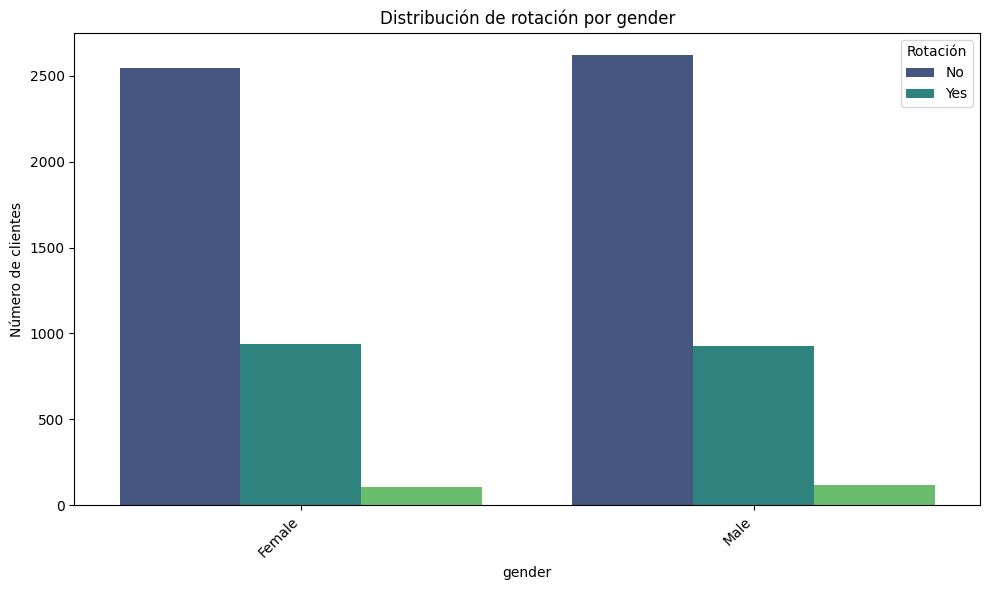

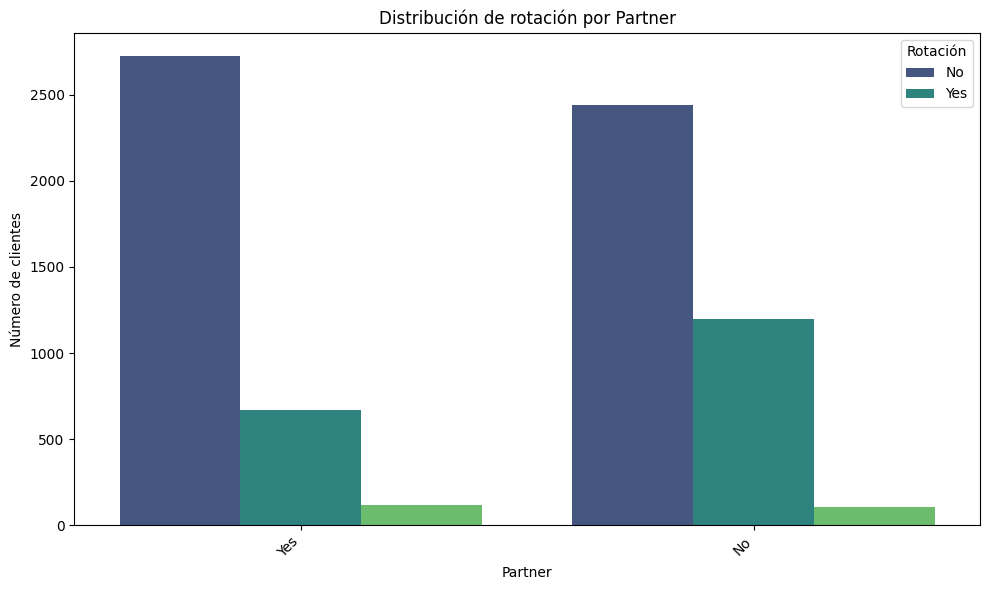

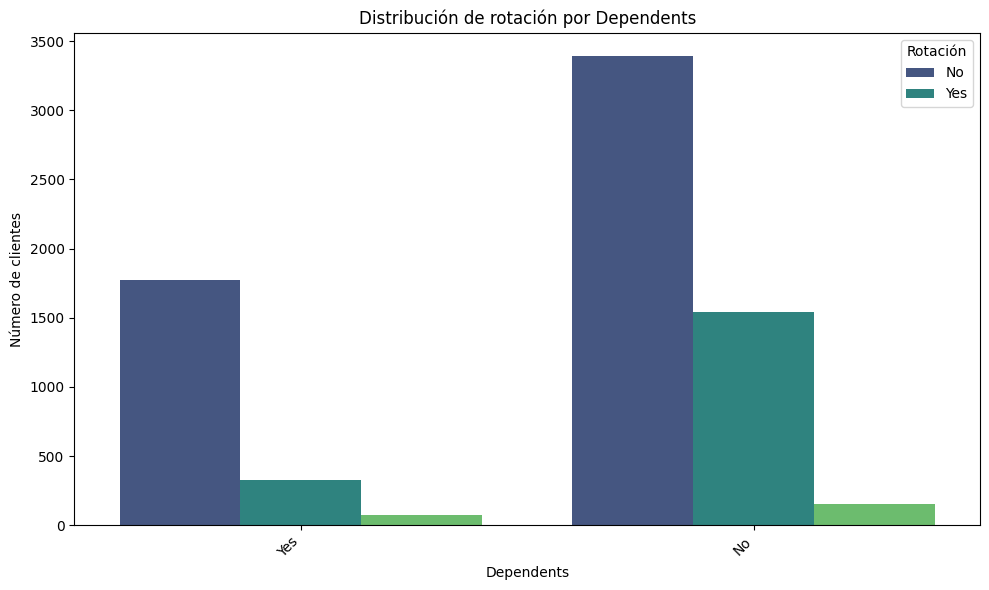

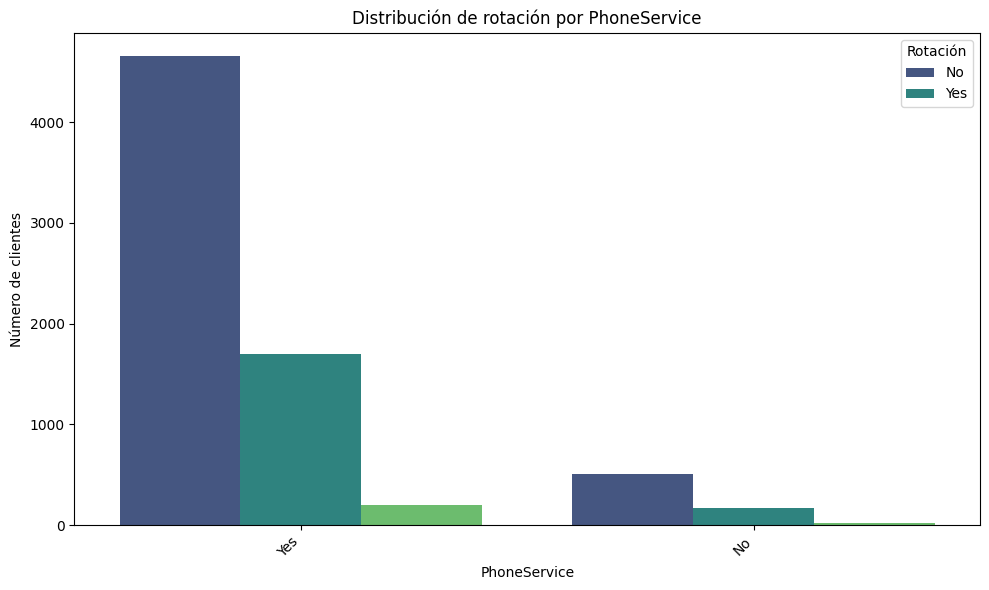

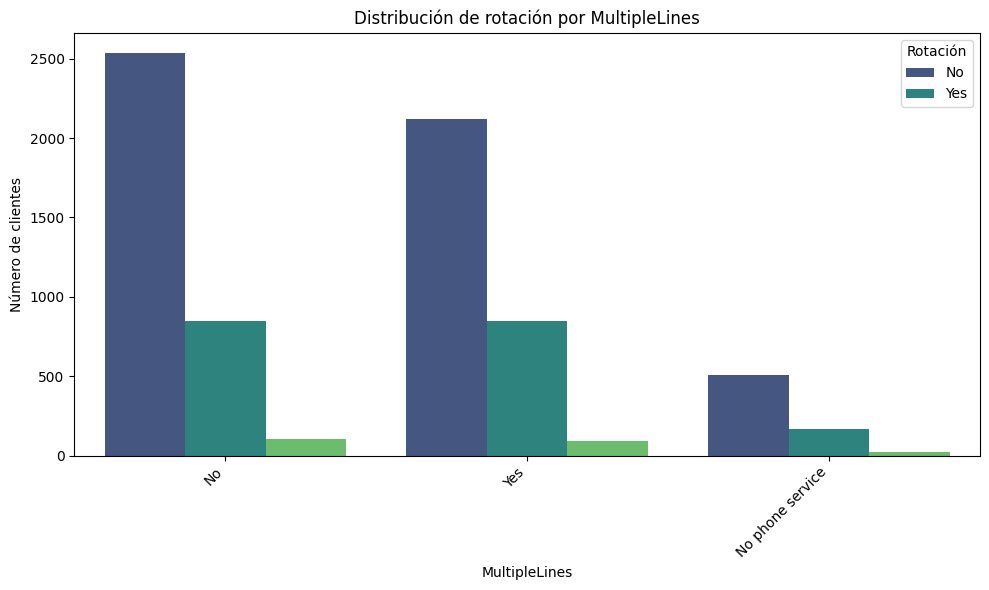

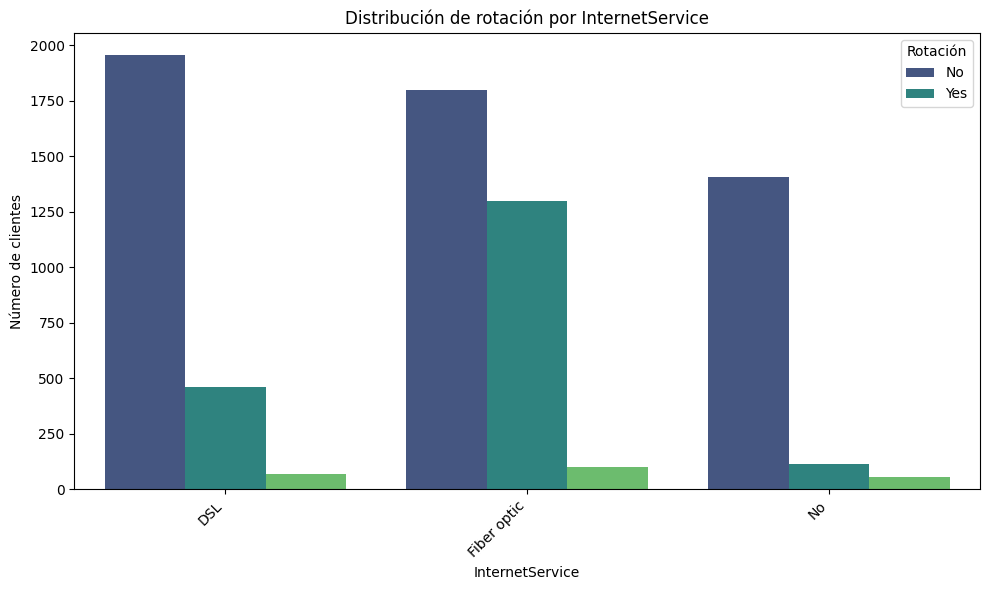

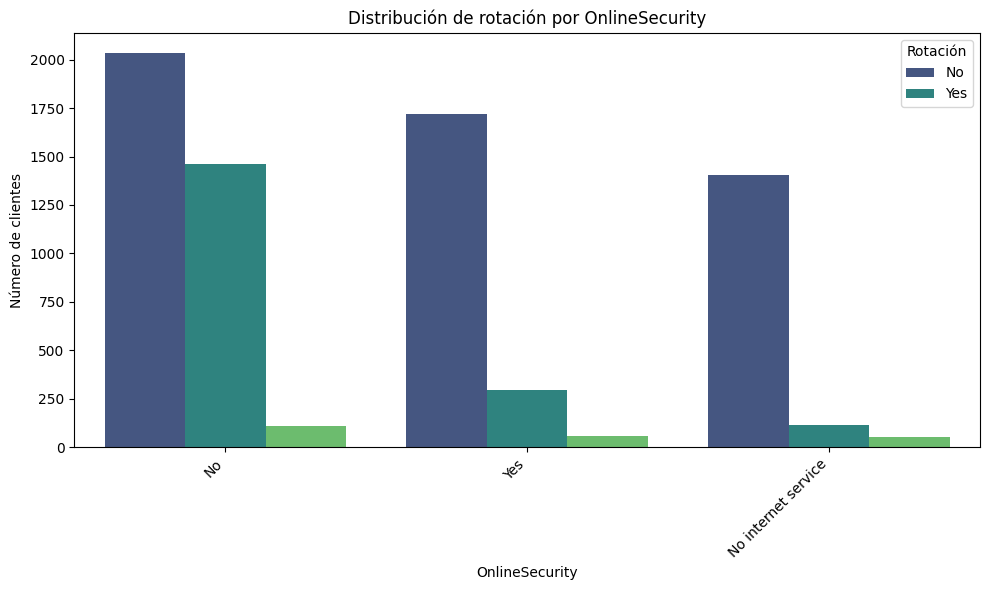

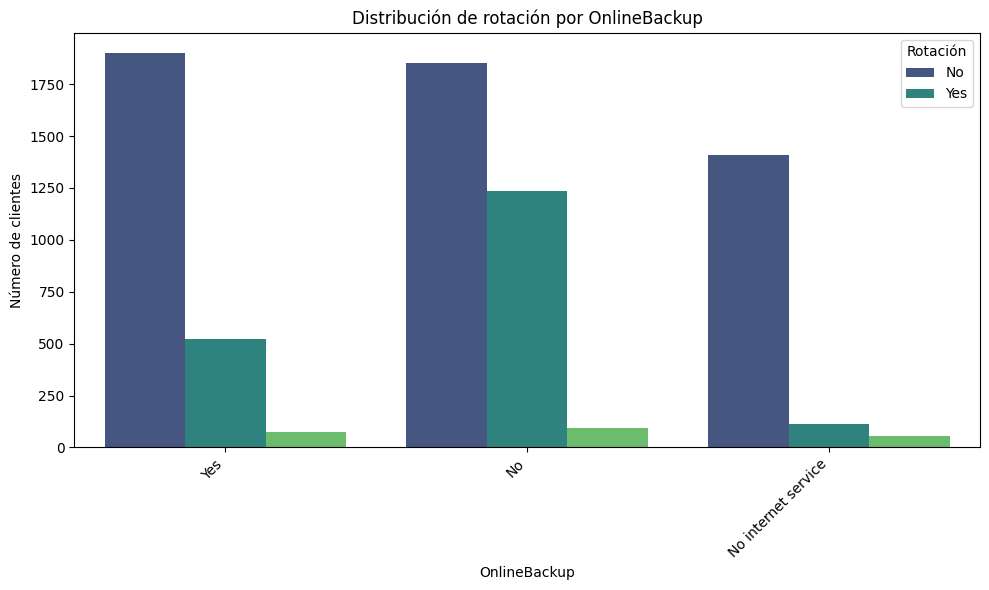

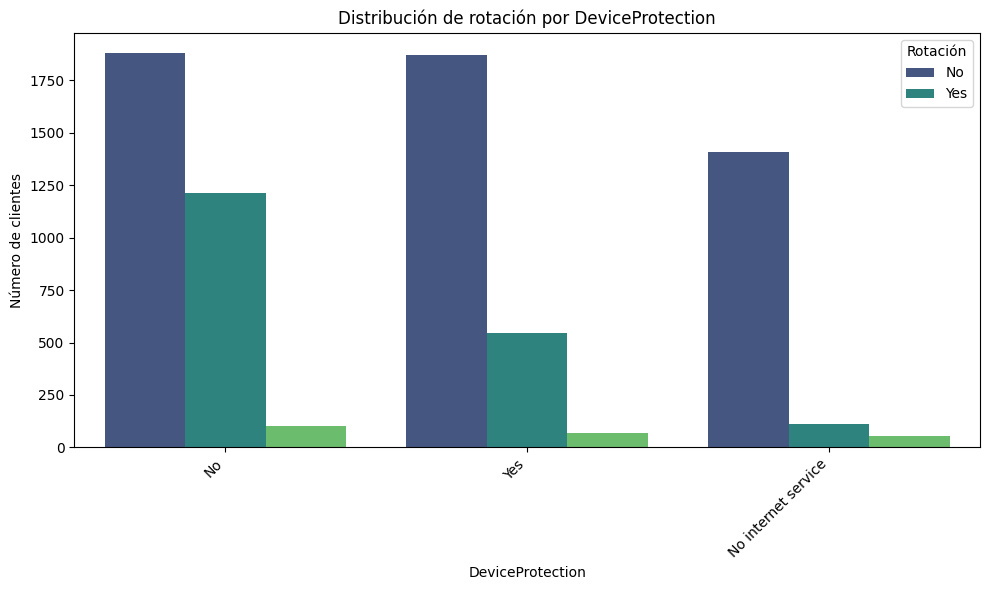

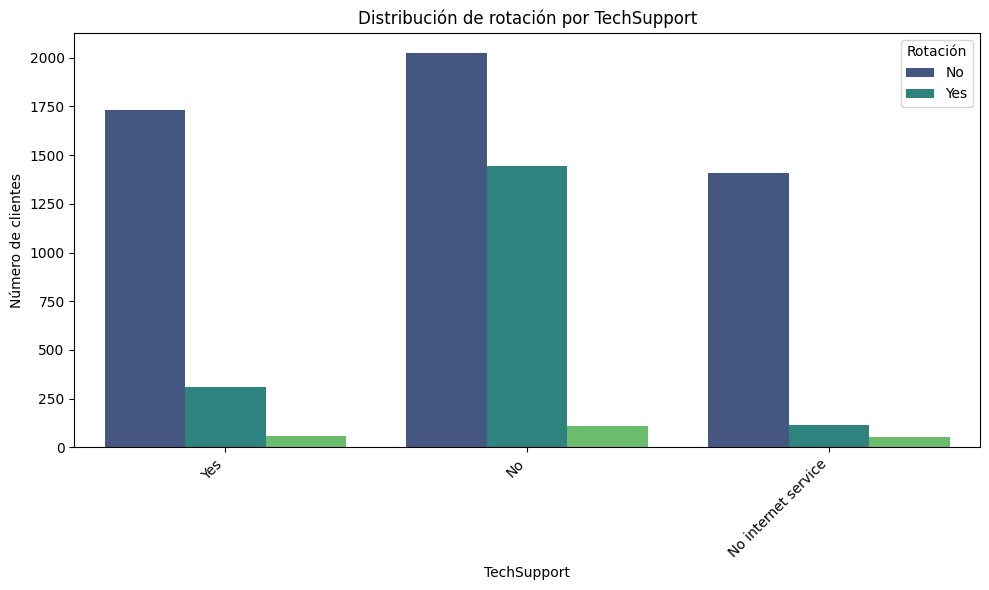

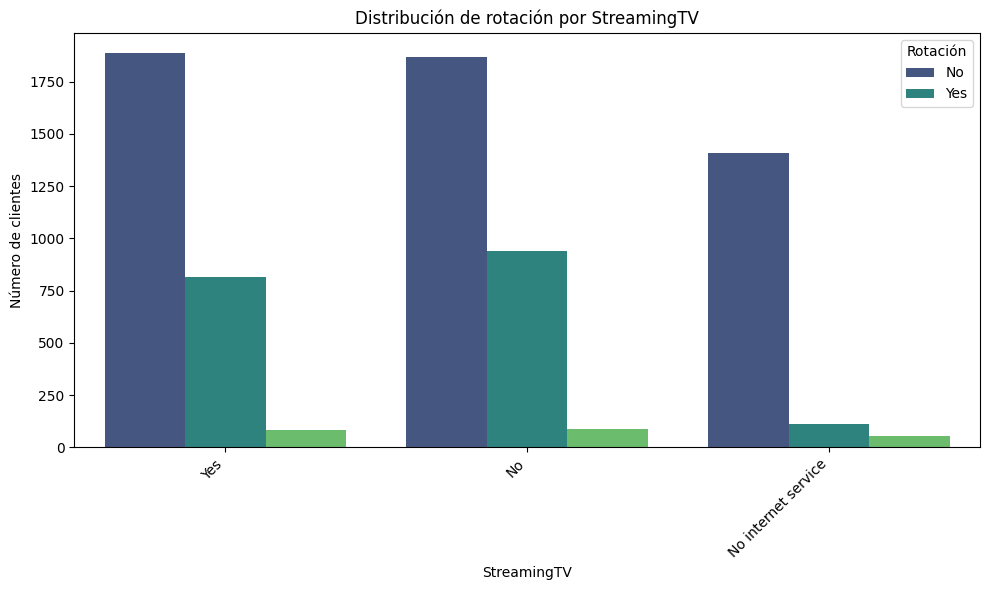

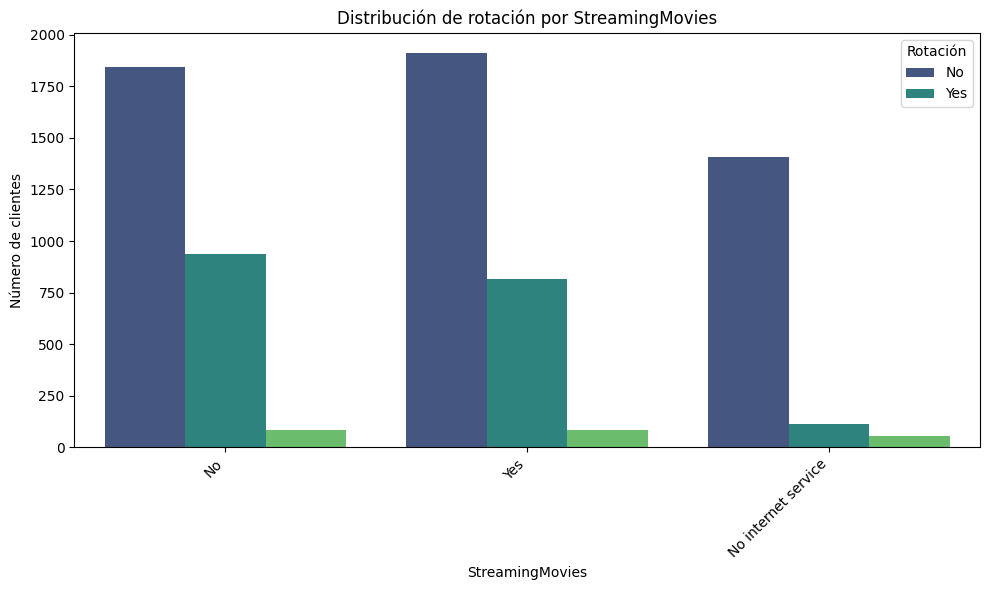

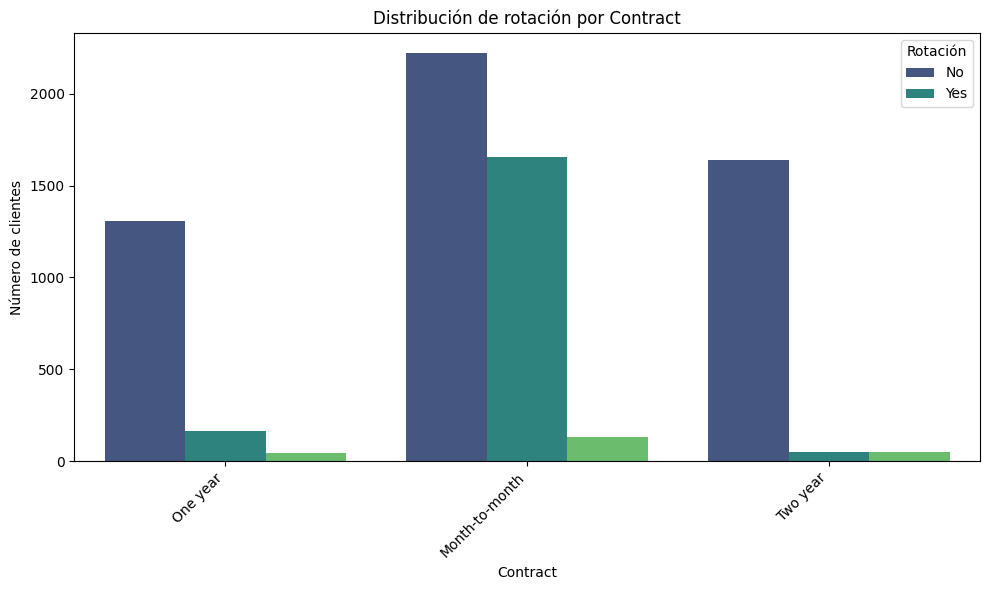

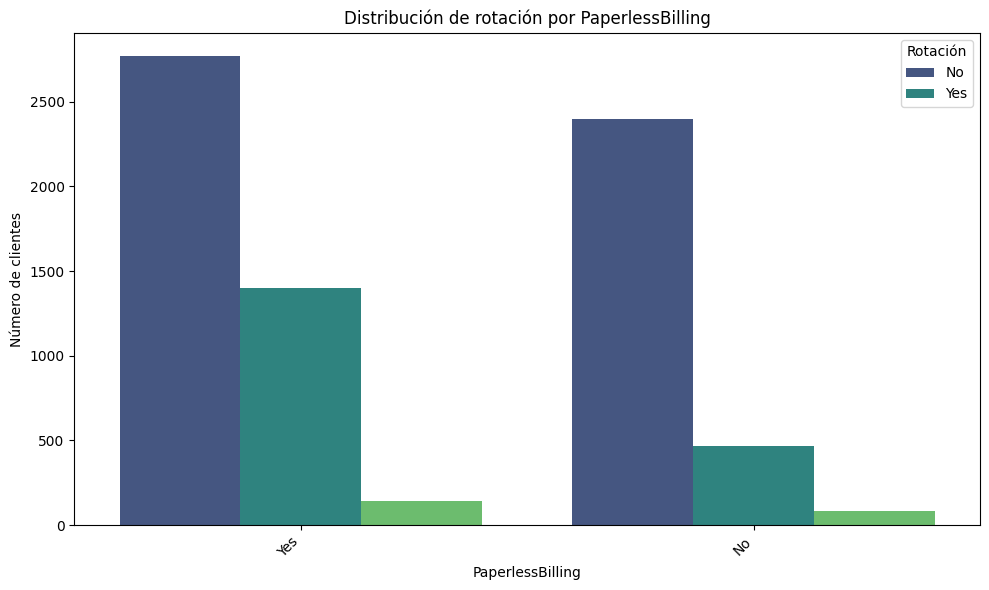

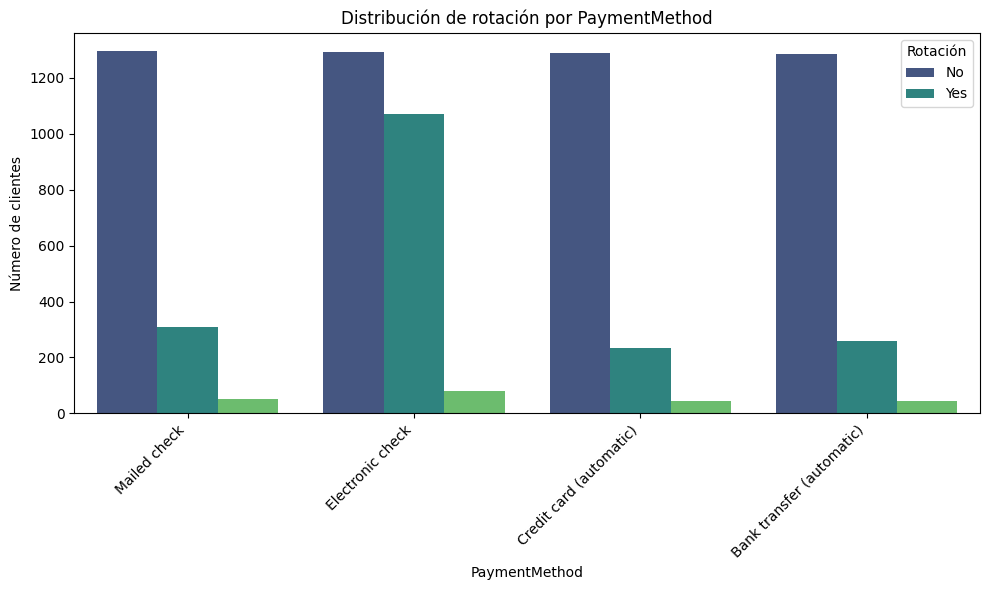

In [55]:
import matplotlib.pyplot as plt # Importa la librería matplotlib.pyplot para crear visualizaciones
import seaborn as sns # Importa la librería seaborn para crear gráficos estadísticos de forma más atractiva

# Identificar columnas categóricas (excluyendo 'customerID' y 'Churn')
# Identifica las columnas con tipo de dato 'object' (generalmente categóricas)
categoricalCols = dfNorm.select_dtypes(include='object').columns.tolist()
# Elimina la columna 'customerID' de la lista, ya que es un identificador y no una variable categórica para el análisis de rotación
categoricalCols.remove('customerID')
# Elimina la columna 'Churn' de la lista, ya que es la variable objetivo que estamos analizando
categoricalCols.remove('Churn')

# Analizar la distribución de la rotación en las variables categóricas
# Itera sobre cada columna categórica restante
for col in categoricalCols:
    # Crea una nueva figura y ejes para cada gráfico
    plt.figure(figsize=(10, 6))
    # Crea un gráfico de barras (countplot) usando seaborn
    # 'data=dfNorm': especifica el DataFrame a usar
    # 'x=col': especifica la columna categórica en el eje x
    # 'hue='Churn'': divide las barras por el valor de la columna 'Churn' (Sí/No)
    # 'palette='viridis'': define la paleta de colores para las barras
    sns.countplot(data=dfNorm, x=col, hue='Churn', palette='viridis')
    # Establece el título del gráfico, incluyendo el nombre de la columna actual
    plt.title(f'Distribución de rotación por {col}') # Distribución de la pérdida de clientes por {col}
    # Establece la etiqueta del eje x con el nombre de la columna actual
    plt.xlabel(col)
    # Establece la etiqueta del eje y como 'Número de clientes'
    plt.ylabel('Número de clientes') # Number of customers
    # Rota las etiquetas del eje x 45 grados para mejorar la legibilidad si son largas
    plt.xticks(rotation=45, ha='right')
    # Muestra la leyenda del gráfico, indicando qué color representa cada valor de 'Churn'
    plt.legend(title='Rotación') # Churn
    # Ajusta automáticamente los parámetros del subplot para dar espacio a las etiquetas
    plt.tight_layout()
    # Muestra el gráfico
    plt.show()

## Análisis de variables numéricas


Selecciona las columnas numéricas y crea gráficos de caja para visualizar la distribución de cada variable numérica para los clientes que han cancelado y los que no han cancelado.

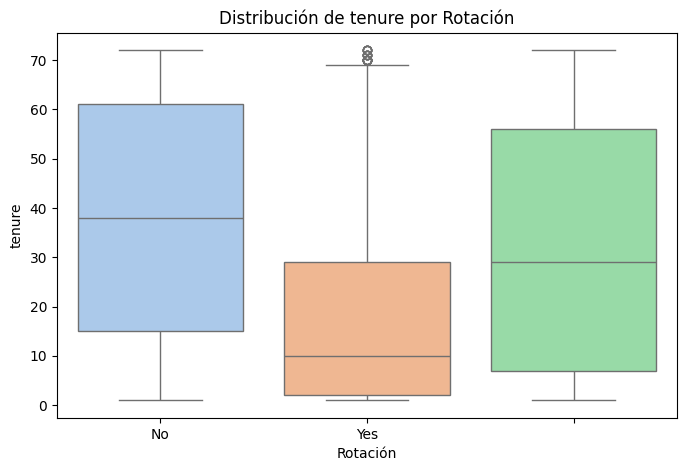

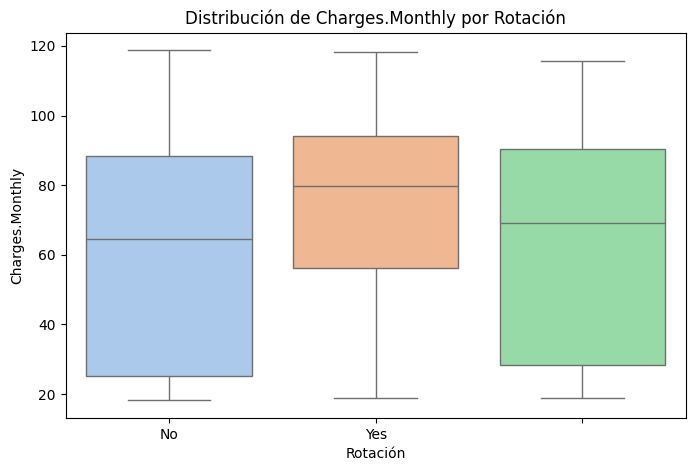

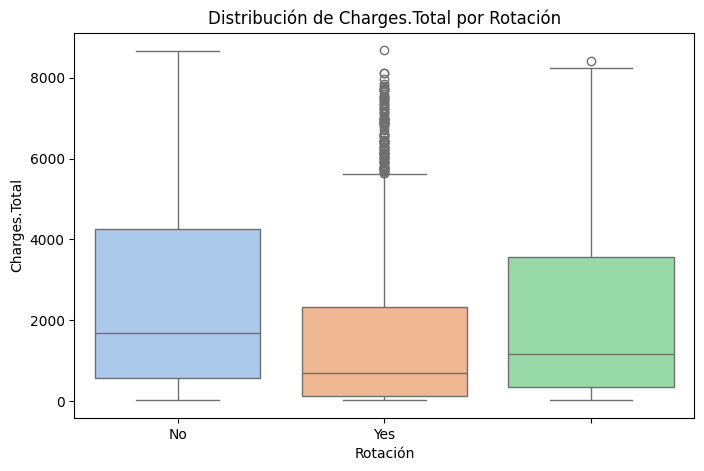

In [56]:
# Seleccionar columnas numéricas para el análisis de distribución por rotación
colsNumericasParaAnalisis = ['tenure', 'Charges.Monthly', 'Charges.Total']

# Analizar la distribución de variables numéricas para clientes con y sin rotación
for col in colsNumericasParaAnalisis:
    # Crear una nueva figura para cada box plot
    plt.figure(figsize=(8, 5))
    # Generar un box plot usando seaborn para visualizar la distribución de la columna numérica por Churn
    sns.boxplot(data=dfNorm, x='Churn', y=col, palette='pastel')
    # Establecer el título del gráfico
    plt.title(f'Distribución de {col} por Rotación') # Distribution of {col} by Churn
    # Establecer la etiqueta del eje x
    plt.xlabel('Rotación')
    # Establecer la etiqueta del eje y
    plt.ylabel(col)
    # Mostrar el gráfico
    plt.show()

#📄Informe final

# Informe Final del Análisis de Rotación de Clientes

## Introducción

Este informe presenta un análisis exploratorio de datos sobre la rotación de clientes de una empresa de telecomunicaciones. El objetivo principal es identificar los factores clave que influyen en que un cliente decida abandonar la compañía y proporcionar información que pueda ayudar a desarrollar estrategias de retención de clientes.

## Pasos de Limpieza de Datos

Inicialmente, se cargaron los datos desde un archivo JSON que contenía información anidada. Se realizaron los siguientes pasos de limpieza:

1.  **Normalización de datos:** Las columnas con estructuras anidadas ('customer', 'phone', 'internet', 'account') se normalizaron en columnas individuales para facilitar el análisis.
2.  **Manejo de valores faltantes:** Se identificaron valores faltantes en la columna `Charges.Total`. Estos valores, que probablemente representaban nuevos clientes sin cargos totales aún, se manejaron eliminando las filas correspondientes para garantizar la integridad del análisis numérico.
3.  **Conversión de tipo de datos:** La columna `Charges.Total` fue identificada como tipo 'object' y se convirtió a tipo numérico (`float64`) para permitir cálculos y análisis estadísticos.

## Análisis Exploratorio de Datos

Se realizó un análisis exploratorio para comprender la distribución de los datos y la relación entre las variables y la rotación de clientes.

### Estadísticas Descriptivas de Variables Numéricas

El análisis descriptivo de las columnas numéricas (`tenure`, `Charges.Monthly`, `Charges.Total`, y `SeniorCitizen`) proporcionó una visión general de las características de los clientes:

*   **`tenure` (Antigüedad):** La antigüedad promedio de los clientes es de aproximadamente 32 meses, con una desviación estándar de 24.5, lo que indica una amplia variación. Hay clientes con muy poca antigüedad (mínimo 1 mes) y clientes de larga duración (máximo 72 meses).
*   **`Charges.Monthly` (Cargos Mensuales):** Los cargos mensuales promedio son de alrededor de 64.76, con una desviación estándar de 30.13. Los cargos varían significativamente, desde 18.25 hasta 118.75.
*   **`Charges.Total` (Cargos Totales):** Los cargos totales promedio son de aproximadamente 2280.63, con una desviación estándar de 2268.63. Esta alta desviación estándar sugiere una distribución amplia, influenciada por la antigüedad y los cargos mensuales.
*   **`SeniorCitizen` (Adulto Mayor):** Aproximadamente el 16% de los clientes son adultos mayores.

### Distribución de Rotación por Variables Categóricas

Los gráficos de barras ilustraron la distribución de la rotación en las variables categóricas:

*   **Género:** La rotación parece estar distribuida de manera similar entre hombres y mujeres, lo que sugiere que el género por sí solo no es un predictor fuerte de la rotación.
*   **Tipo de Contrato:** Los clientes con contratos "Month-to-month" (mes a mes) tienen una tasa de rotación significativamente más alta en comparación con aquellos con contratos de uno o dos años. Este es un hallazgo clave, indicando que los contratos a largo plazo fomentan la retención.
*   **Método de Pago:** Los clientes que utilizan "Electronic check" (cheque electrónico) como método de pago muestran una mayor propensión a la rotación en comparación con otros métodos.
*   **Servicio de Internet:** Los clientes con servicio de "Fiber optic" (fibra óptica) tienen una tasa de rotación considerablemente más alta que aquellos con "DSL" o sin servicio de internet.
*   **Servicios Adicionales:** La ausencia de servicios adicionales como Online Security, Online Backup, Device Protection, Tech Support, Streaming TV y Streaming Movies parece estar asociada con una mayor rotación. Los clientes que tienen estos servicios tienden a rotar menos.
*   **Socios y Dependientes:** Los clientes que no tienen pareja (`Partner`) o dependientes (`Dependents`) muestran una mayor tasa de rotación.

### Distribución de Variables Numéricas por Rotación

Los diagramas de caja compararon la distribución de las variables numéricas para clientes que rotaron y los que no:

*   **`tenure` (Antigüedad):** Los clientes que rotaron tienden a tener una antigüedad significativamente menor en comparación con los que no rotaron. Esto refuerza la idea de que los clientes de largo plazo son más leales.
*   **`Charges.Monthly` (Cargos Mensuales):** Los clientes que rotaron tienen cargos mensuales promedio más altos que los que no rotaron. Esto podría indicar que los clientes con servicios más costosos o con fibra óptica son más propensos a irse, posiblemente debido a la competencia o problemas de calidad.
*   **`Charges.Total` (Cargos Totales):** Los clientes que no rotaron tienen cargos totales significativamente más altos que los que rotaron. Esto es consistente con la menor antigüedad de los clientes que rotan; aunque sus cargos mensuales puedan ser altos, su menor tiempo como clientes resulta en menores cargos totales acumulados.

## Conclusiones

Basado en el análisis exploratorio, los principales factores asociados con la rotación de clientes son:

*   **Tipo de Contrato:** Los contratos mes a mes son un fuerte predictor de rotación.
*   **Antigüedad del Cliente:** Los clientes con menor antigüedad son más propensos a rotar.
*   **Servicio de Fibra Óptica:** Los clientes con fibra óptica tienen una mayor tasa de rotación.
*   **Método de Pago (Cheque Electrónico):** El uso de cheque electrónico está asociado con una mayor rotación.
*   **Falta de Servicios Adicionales:** La ausencia de servicios de seguridad, soporte técnico y streaming aumenta la probabilidad de rotación.
*   **Clientes sin Pareja o Dependientes:** Estos clientes tienden a rotar más.
*   **Cargos Mensuales Elevados:** Los clientes con cargos mensuales más altos son más propensos a rotar, especialmente en los primeros meses.

## Recomendaciones

Para mitigar la rotación de clientes, se sugieren las siguientes recomendaciones:

*   **Incentivar Contratos a Largo Plazo:** Ofrecer descuentos o beneficios atractivos para que los clientes cambien de contratos mes a mes a contratos de uno o dos años.
*   **Programas de Lealtad para Clientes Nuevos:** Implementar programas para retener a los clientes en sus primeros meses, que es cuando la rotación es más alta.
*   **Mejorar la Experiencia del Cliente de Fibra Óptica:** Investigar las razones detrás de la alta rotación entre los usuarios de fibra óptica (problemas de calidad, soporte, precio) y tomar medidas correctivas.
*   **Evaluar el Método de Pago con Cheque Electrónico:** Analizar si hay problemas o fricciones asociadas con el uso de cheque electrónico que puedan contribuir a la rotación.
*   **Promocionar Servicios Adicionales:** Destacar los beneficios de los servicios de seguridad, soporte y entretenimiento para aumentar su adopción y mejorar la retención.
*   **Estrategias de Retención Segmentadas:** Desarrollar estrategias específicas para clientes sin pareja o dependientes, quienes muestran una mayor propensión a rotar.
*   **Análisis Detallado de Clientes con Altos Cargos Mensuales Iniciales:** Monitorear a los clientes con altos cargos mensuales en sus primeros meses y ofrecer soporte proactivo o revisar la estructura de precios si es necesario.

## Análisis de Correlación

Exploramos la correlación entre las variables numéricas y la variable objetivo 'Churn'. Esto nos ayudará a entender la fuerza y dirección de la relación lineal entre estas variables.

In [57]:
# Convertir la columna 'Churn' a numérica para el cálculo de correlación
# Asignamos 1 a 'Yes' (rotación) y 0 a 'No' (no rotación)
dfNorm['Churn_numeric'] = dfNorm['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
# Incluimos la nueva columna numérica de Churn
dfNumerico = dfNorm.select_dtypes(include=['number'])

# Calcular la matriz de correlación
matrizCorrelacion = dfNumerico.corr()

# Mostrar la matriz de correlación
display(matrizCorrelacion)

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn_numeric
SeniorCitizen,1.000000,0.017333,0.220098,0.103499,0.146400
tenure,0.017333,1.000000,0.246981,0.825118,-0.345799
Charges.Monthly,0.220098,0.246981,1.000000,0.652109,0.189393
Charges.Total,0.103499,0.825118,0.652109,1.000000,-0.194440
Churn_numeric,0.146400,-0.345799,0.189393,-0.194440,1.000000


### Visualización de la Matriz de Correlación

Visualizamos la matriz de correlación utilizando un mapa de calor para identificar rápidamente las relaciones entre las variables numéricas.

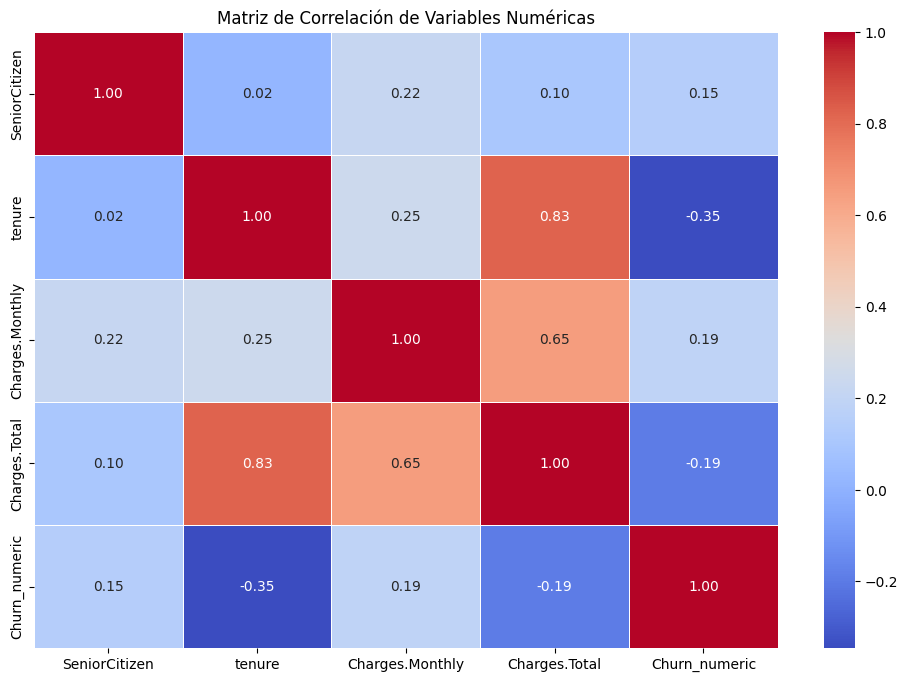

In [58]:
# Crea una nueva figura para el mapa de calor con un tamaño específico (12x8 pulgadas)
plt.figure(figsize=(12, 8))
# Genera un mapa de calor (heatmap) usando seaborn
# 'matrizCorrelacion': especifica la matriz de datos a visualizar
# 'annot=True': muestra los valores de correlación en las celdas del mapa de calor
# 'cmap='coolwarm'': define la paleta de colores (azul para correlaciones negativas, rojo para positivas)
# 'fmt=".2f"': formatea los números mostrados en las celdas a dos decimales
# 'linewidths=.5': añade líneas entre las celdas para mejorar la separación
sns.heatmap(matrizCorrelacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# Establece el título del mapa de calor
plt.title('Matriz de Correlación de Variables Numéricas')
# Muestra el mapa de calor generado
plt.show()

### Correlación de Variables Específicas con Churn

Nos enfocaremos en la correlación entre la rotación ('Churn_numeric') y algunas variables clave como la antigüedad ('tenure'), los cargos mensuales ('Charges.Monthly') y los cargos totales ('Charges.Total'), así como la relación con el número de servicios contratados.

In [59]:
# Correlación de Churn con variables numéricas clave
# Imprime una línea en blanco y el encabezado para la sección de correlación con Churn
print("\nCorrelación con Churn:")
# Selecciona la columna 'Churn_numeric' de la matriz de correlación,
# ordena los valores de correlación de forma descendente (de mayor a menor)
# e imprime el resultado.
print(matrizCorrelacion['Churn_numeric'].sort_values(ascending=False))


Correlación con Churn:
Churn_numeric      1.000000
Charges.Monthly    0.189393
SeniorCitizen      0.146400
Charges.Total     -0.194440
tenure            -0.345799
Name: Churn_numeric, dtype: float64


Para analizar la relación entre la cantidad de servicios contratados y la probabilidad de churn, primero necesitamos crear una columna que cuente el número de servicios para cada cliente. Luego podemos analizar su correlación o distribución con 'Churn'.


Correlación entre el número de servicios y Churn: -0.02


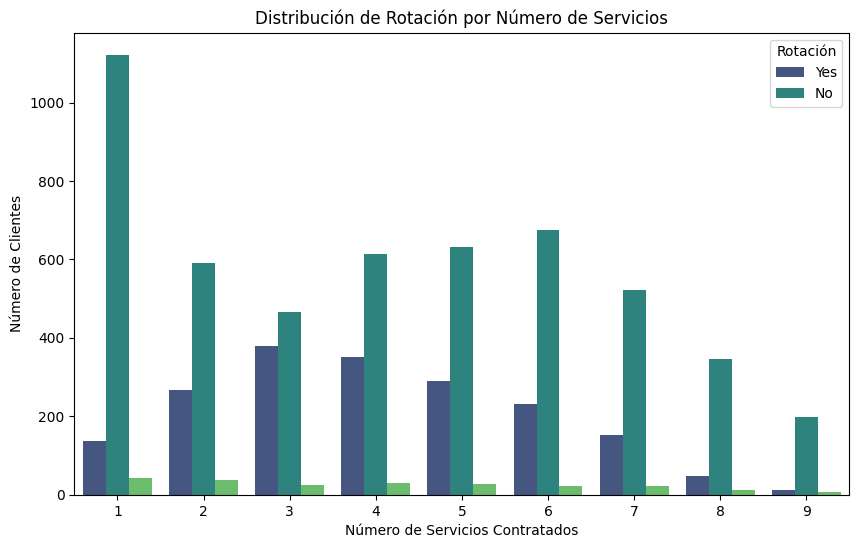

In [61]:
# Identificar columnas relacionadas con servicios
colServicios = ['PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# Contar el número de servicios para cada cliente
# Asumimos que 'No', 'No internet service', 'No phone service' significan ausencia del servicio
def contarServicios(row):
    count = 0
    for col in colServicios:
        if row[col] not in ['No', 'No internet service', 'No phone service']:
            count += 1
    # Considerar también 'SeniorCitizen' si se desea incluir como un tipo de "estado" o "segmento"
    # if row['SeniorCitizen'] == 1:
    #     count += 1
    # Aquí puedes añadir otras columnas binarias o categóricas si las consideras "servicios" o características relevantes
    # if row['Partner'] == 'Yes':
    #     count += 1
    # if row['Dependents'] == 'Yes':
    #     count += 1
    # if row['PaperlessBilling'] == 'Yes':
    #     count += 1
    return count

dfNorm['numServicios'] = dfNorm.apply(contarServicios, axis=1)

# Calcular la correlación entre Num_Services y Churn_numeric
correlation_num_services_churn = dfNorm['numServicios'].corr(dfNorm['Churn_numeric'])

print(f"\nCorrelación entre el número de servicios y Churn: {correlation_num_services_churn:.2f}")

# Opcional: Visualizar la distribución de Churn por número de servicios
plt.figure(figsize=(10, 6))
sns.countplot(data=dfNorm, x='numServicios', hue='Churn', palette='viridis')
plt.title('Distribución de Rotación por Número de Servicios')
plt.xlabel('Número de Servicios Contratados')
plt.ylabel('Número de Clientes')
plt.legend(title='Rotación')
plt.show()